# Image Enhancement

In [97]:
import cv2 as cv
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

## Original photo

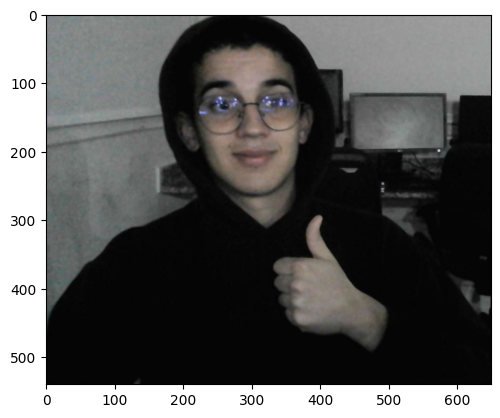

In [98]:
image = cv.imread('../images/me.jpg', cv.IMREAD_COLOR_RGB)
image = cv.resize(image, None, fx=0.5, fy=0.5)
image = image[:, :650]
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(image)

## Addition or Brightness

Text(0.5, 1.0, 'Darkened Image')

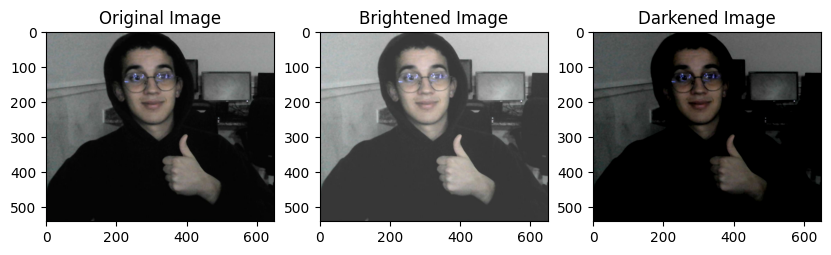

In [99]:
value = 50

image_bright = cv.add(image, value)
image_dark = cv.subtract(image, value)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(image_bright)
plt.title('Brightened Image')
plt.subplot(1, 3, 3)
plt.imshow(image_dark)
plt.title('Darkened Image')

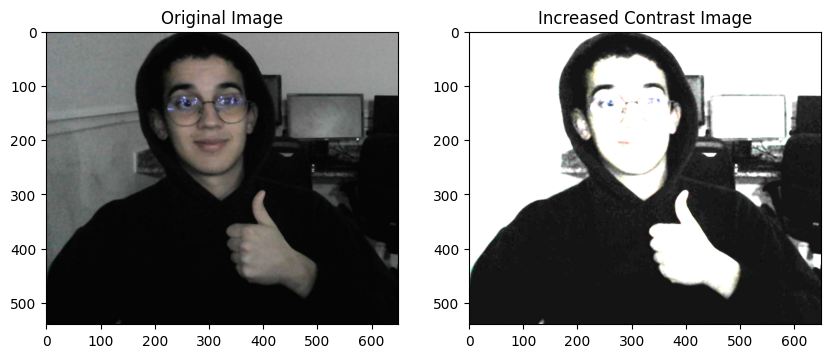

In [100]:
image_contrast = cv.multiply(image, 4)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title('Increased Contrast Image')
plt.imshow(image_contrast)

## Image Thresholding

70.0


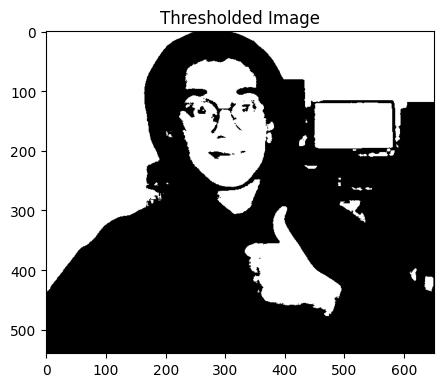

In [101]:
tresh, img_thresh = cv.threshold(image_gray, 70, 255, cv.THRESH_BINARY)
print(tresh)
plt.figure(figsize=(5, 5))
plt.title('Thresholded Image')
plt.imshow(img_thresh, cmap='gray')

## Application: Sheet Music Reader
Suppose you wanted to build an application that could read (decode) sheet music. This is similar to Optical Character Recognigition (OCR) for text documents where the goal is to recognize text characters. In either application, one of the first steps in the processing pipeline is to isolate the important information in the image of a document (separating it from the background). This task can be accomplished with thresholding techniques. Let's take a look at an example.

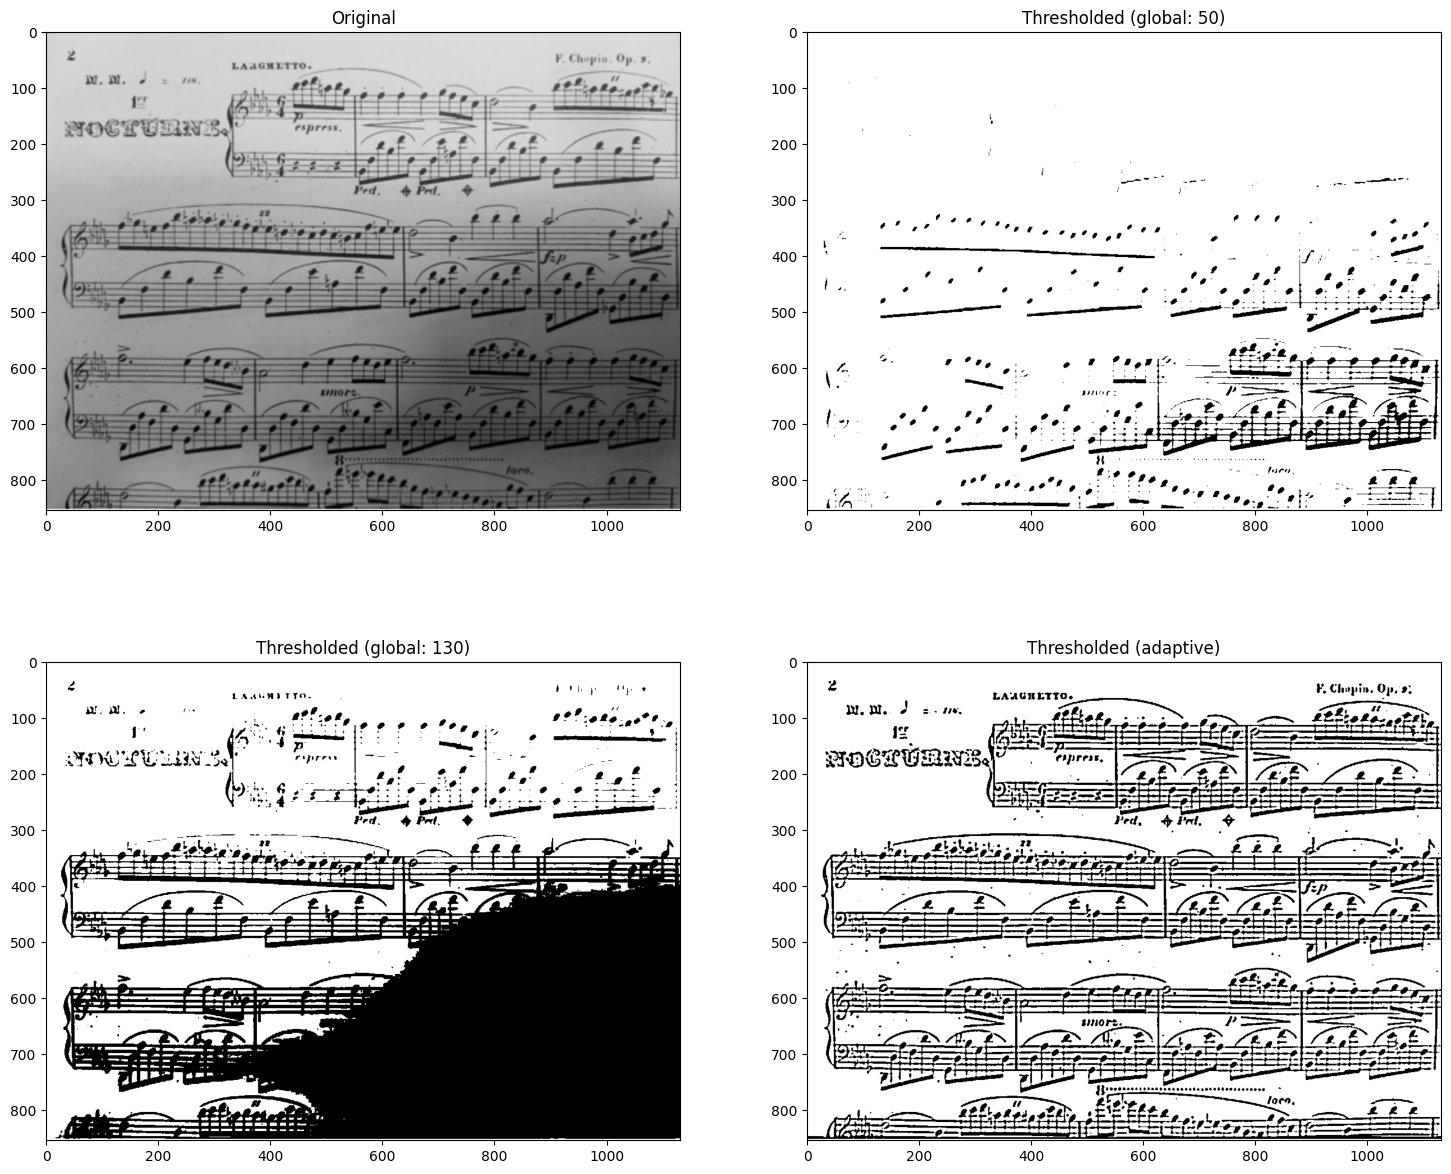

In [102]:
# Read the original image
img_read = cv.imread("../images/Piano_Sheet_Music.png", cv.IMREAD_GRAYSCALE)

# Perform global thresholding
retval, img_thresh_gbl_1 = cv.threshold(img_read, 50, 255, cv.THRESH_BINARY)

# Perform global thresholding
retval, img_thresh_gbl_2 = cv.threshold(img_read, 130, 255, cv.THRESH_BINARY)

# Perform adaptive thresholding
img_thresh_adp = cv.adaptiveThreshold(img_read, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 7)

# Show the images
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img_read,        cmap="gray");  plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_gbl_1,cmap="gray");  plt.title("Thresholded (global: 50)");
plt.subplot(223); plt.imshow(img_thresh_gbl_2,cmap="gray");  plt.title("Thresholded (global: 130)");
plt.subplot(224); plt.imshow(img_thresh_adp,  cmap="gray");  plt.title("Thresholded (adaptive)");

## Bitwise Operations

(200, 499)


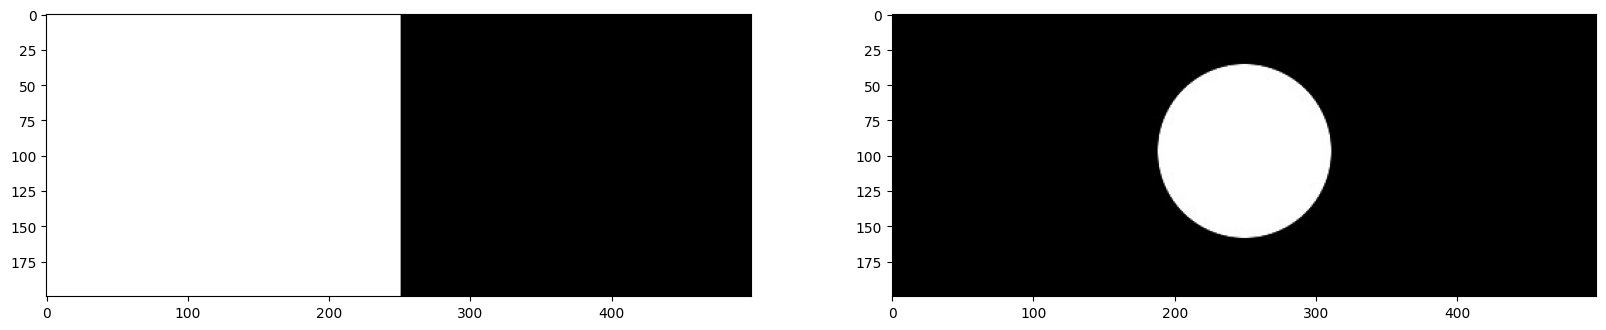

In [103]:
img_rec = cv.imread("../images/rectangle.jpg", cv.IMREAD_GRAYSCALE)

img_cir = cv.imread("../images/circle.jpg", cv.IMREAD_GRAYSCALE)

plt.figure(figsize=[20, 5])
plt.subplot(121);plt.imshow(img_rec, cmap="gray")
plt.subplot(122);plt.imshow(img_cir, cmap="gray")
print(img_rec.shape)

### Examples NOT, AND, OR, XOR

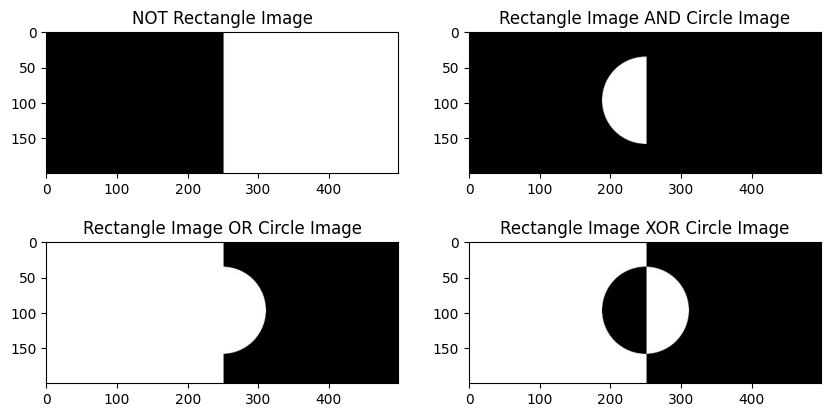

In [104]:
image_not = cv.bitwise_not(img_rec)
image_and = cv.bitwise_and(img_rec, img_cir)
image_or = cv.bitwise_or(img_rec, img_cir)
image_xor = cv.bitwise_xor(img_rec, img_cir)

plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.title('NOT Rectangle Image')
plt.imshow(image_not, cmap='gray')
plt.subplot(2, 2, 2)
plt.title('Rectangle Image AND Circle Image')
plt.imshow(image_and, cmap='gray')
plt.subplot(2, 2, 3)
plt.title('Rectangle Image OR Circle Image')
plt.imshow(image_or, cmap='gray')
plt.subplot(2, 2, 4)
plt.title('Rectangle Image XOR Circle Image')
plt.imshow(image_xor, cmap='gray')

## Application: Logo Manipulation

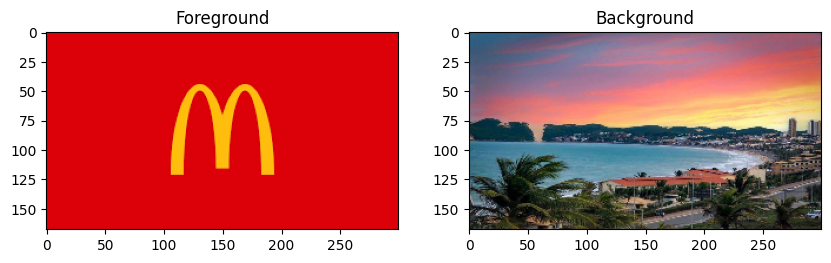

In [105]:
foreground_img = cv.imread('../images/mcdonald.png', cv.IMREAD_COLOR_RGB)
background_img = cv.imread('../images/landscape.jpg', cv.IMREAD_COLOR_RGB)

foreground_width, foreground_height, _ = foreground_img.shape
background_img = cv.resize(background_img, (foreground_height, foreground_width)) # Resize to the exact size of the foreground image

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title("Foreground")
plt.imshow(foreground_img)
plt.subplot(122)
plt.title("Background")
plt.imshow(background_img)

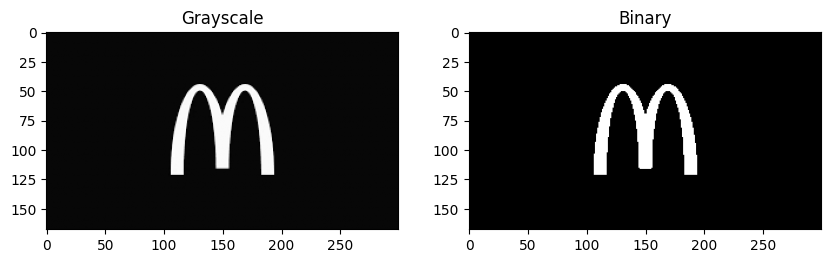

In [106]:
foreground_gray = cv.cvtColor(foreground_img, cv.COLOR_RGB2GRAY)
_, foreground_bin = cv.threshold(foreground_gray, 127, 255, cv.THRESH_BINARY)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title("Grayscale")
plt.imshow(foreground_gray, cmap="gray")
plt.subplot(122)
plt.title("Binary")
plt.imshow(foreground_bin, cmap="gray")


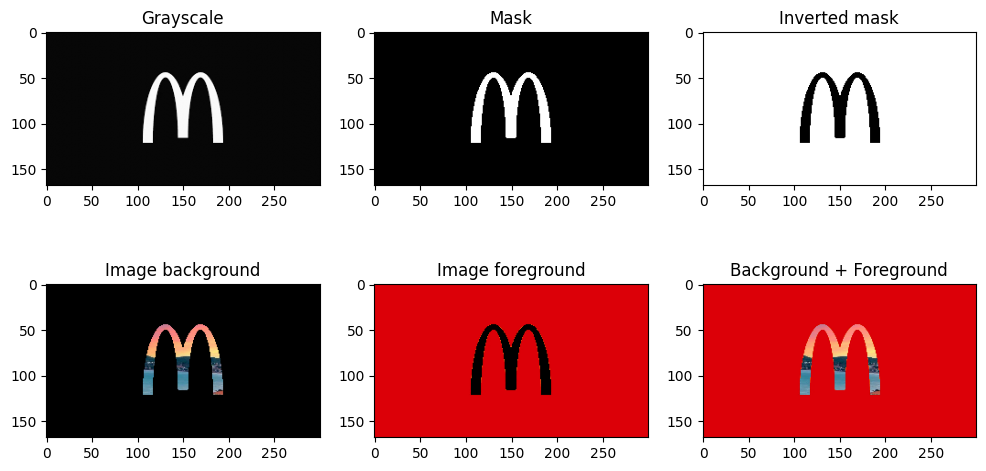

In [109]:
_, foreground_mask = cv.threshold(foreground_bin, 127, 255, cv.THRESH_BINARY)
foreground_mask_inv = cv.bitwise_not(foreground_mask)

background_img = cv.bitwise_and(background_img, background_img, mask=foreground_mask)
foreground_img = cv.bitwise_and(foreground_img, foreground_img, mask=foreground_mask_inv)
image_final = cv.bitwise_or(background_img, foreground_img)

plt.figure(figsize=(12, 6))
plt.subplot(231)
plt.title("Grayscale")
plt.imshow(foreground_gray, cmap='gray')
plt.subplot(232)
plt.title("Mask")
plt.imshow(foreground_mask, cmap='gray')
plt.subplot(233)
plt.title("Inverted mask")
plt.imshow(foreground_mask_inv, cmap='gray')
plt.subplot(234)
plt.title("Image background")
plt.imshow(background_img)
plt.subplot(235)
plt.title("Image foreground")
plt.imshow(foreground_img)
plt.subplot(236)
plt.title("Background + Foreground")
plt.imshow(image_final)
plt.show()